In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\Data Science\python\Trip_advisor_review.csv")

In [3]:
# sample_dist={ 'emp1': {'name':"mac", 'salary':8000,'age':20},
#               'emp2':{'name':"bob", 'salary':7000,'age':25},
#               'emp3':{'name':"Mohan", 'salary':6000,'age':30}}

In [4]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.Review= df.Review.str.lower()

In [7]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [8]:
from nltk.corpus import stopwords
abcd= stopwords.words("english")

In [9]:
import string

In [10]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not  in abcd]

In [11]:
df.Review.apply(text_process)

In [12]:
df.Rating.replace({2:1,3:2,4:3,5:3},inplace=True)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
bow_transformer = CountVectorizer(analyzer= text_process). fit(df['Review'])

In [15]:
tdm= bow_transformer.transform(df.Review)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x,test_x,train_y,test_y=train_test_split(tdm,df.Rating, test_size=.2, random_state=71)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [19]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [20]:
pred= dt.predict(test_x)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
tab=confusion_matrix(test_y,pred)

In [23]:
tab.diagonal().sum()*100/tab.sum()

74.16443034886558

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(train_x,train_y)

MultinomialNB()

In [25]:

pred_nb= nb.predict(test_x)
tab_nb=confusion_matrix(test_y, pred_nb)
tab_nb.diagonal().sum()*100/tab_nb.sum()


83.9717004147353

In [26]:
# convert the matrix into 3*3:
# covert 2 to 1
#convert 3 to 2
#convert 4,5 to 3

In [32]:
tab= pd.DataFrame(tab_nb)
tab.columns=["negative","neutral","positive"]
tab.index=["negative","neutral","positive"]

In [33]:
tab

,negative,neutral,positive
negative,474,16,164
neutral,56,14,370
positive,36,15,2954


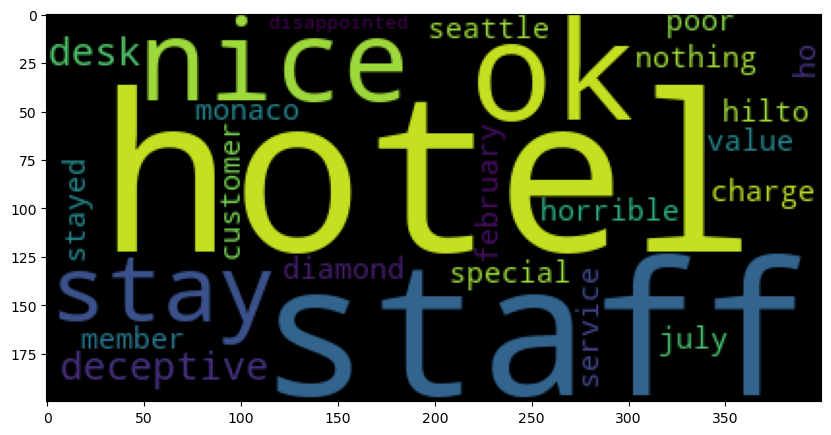

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(df.Review[df.Rating==1]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

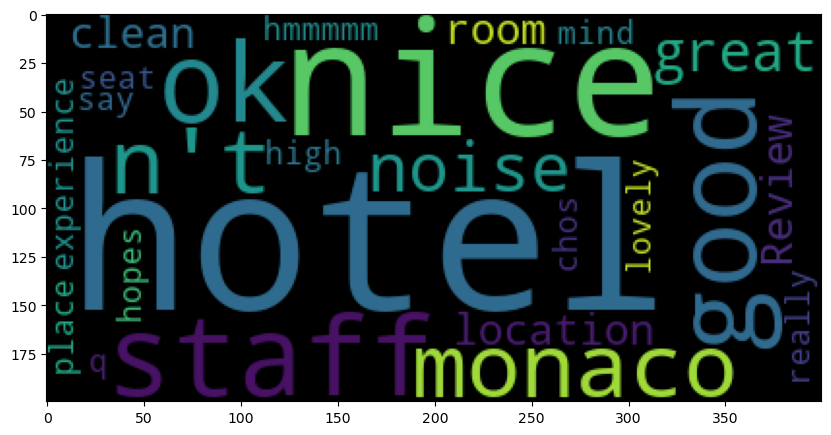

In [39]:
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(df.Review[df.Rating==2]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

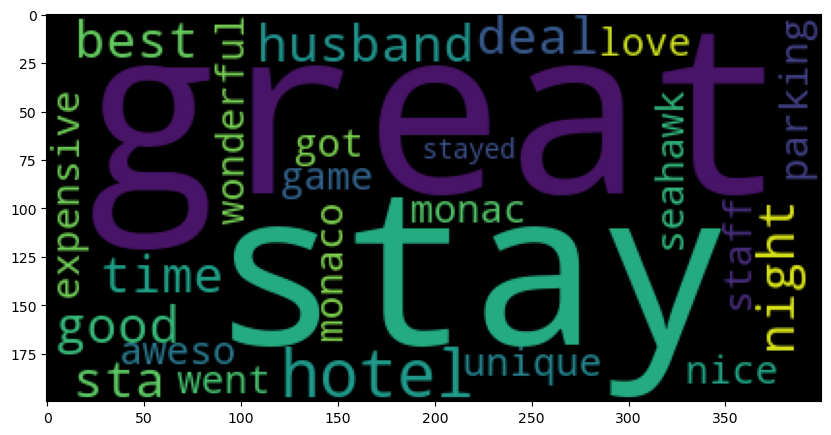

In [40]:
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(df.Review[df.Rating==3]))
plt.figure(figsize=(10,10))
plt.imshow(cloud)